In [10]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def show(img, title='Image'):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # 不显示坐标轴
    plt.title(title) # 图像题目
    plt.show()

# 图像梯度

一般情况下，图像梯度计算的是图像的边缘信息。

## Sobel算子

在实际操作中，计算梯度值可能会出现负数。如果处理的图像是8位图类型，则在ddepth的参数值为-1时，意味着指定运算结果也是8位图类型，那么所有负数会自动截断为0，发生信息丢失。为了避免信息丢失，在计算时要先使用更高的数据类型cv2.CV_64F，再通过取绝对值将其映射为cv2.CV_8U（8位图）类型。所以，通常要将函数cv2.Sobel()内参数ddepth的值设置为“cv2.CV_64F”。

In [22]:
img = cv2.imread('images/containers.jpeg', 0)

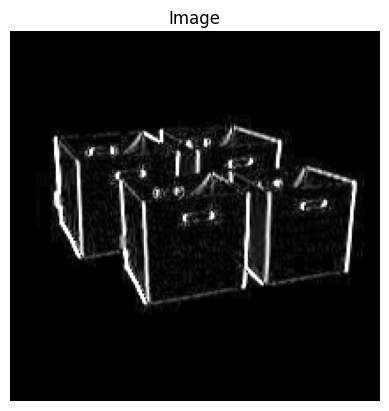

In [26]:
dst = cv2.Sobel(img, cv2.CV_64F, dx = 1, dy = 0)
dst_abs = cv2.convertScaleAbs(dst)
# 各种CV格式的区别：https://stackoverflow.com/a/8377144/19547229
dst = cv2.cvtColor(dst_abs, cv2.CV_8U)
show(dst_abs)

## Scharr算子

在离散的空间上，有很多方法可以用来计算近似导数，在使用3×3的Sobel算子时，可能计算结果并不太精准。OpenCV提供了Scharr算子，该算子具有和Sobel算子同样的速度，且精度更高。

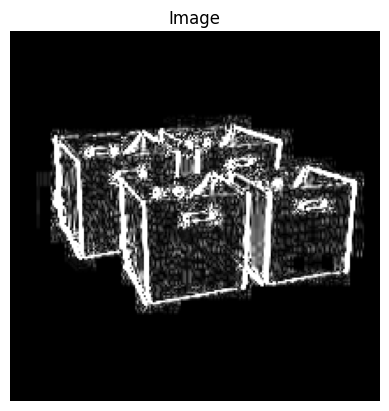

In [27]:
dst = cv2.Scharr(img, cv2.CV_64F, dx = 1, dy = 0)
dst_abs = cv2.convertScaleAbs(dst)
dst = cv2.cvtColor(dst_abs, cv2.CV_8U)
show(dst_abs)

## Laplacian算子

Laplacian（拉普拉斯）算子是一种二阶导数算子，其具有旋转不变性，可以满足不同方向的图像边缘锐化（边缘检测）的要求。通常情况下，其算子的系数之和需要为零。

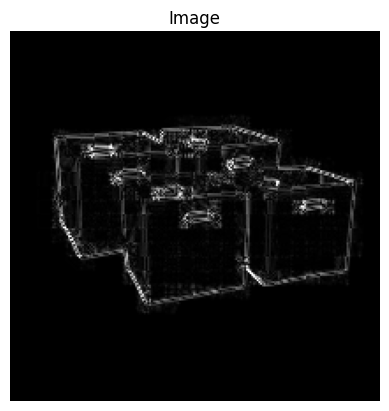

In [30]:
dst = cv2.Laplacian(img, cv2.CV_64F, 20)
dst_abs = cv2.convertScaleAbs(dst)
dst = cv2.cvtColor(dst_abs, cv2.CV_8U)
show(dst_abs)

## 总结
Sobel算子和Scharr算子计算的都是一阶近似导数的值。

Laplacian算子计算的是二阶近似导数值。